In [1]:
import pybaseball as pb 
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
# import cubs 2016 record
cubs = pb.schedule_and_record(2025, 'CHC')

http://www.baseball-reference.com/teams/CHC/2025-schedule-scores.shtml


c:\Users\patri\Desktop\code\Baseball-Stats\.venv\lib\site-packages\pybaseball\team_results.py:75: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric


In [7]:
cubs.head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,cLI,Streak,Orig. Scheduled
1,"Tuesday, Mar 18",CHC,Home,LAD,L,1.0,4.0,9.0,0-1,5.0,0.5,Yamamoto,Brown,Scott,2:38,N,42365.0,.96,-1.0,None
2,"Wednesday, Mar 19",CHC,Home,LAD,L,3.0,6.0,9.0,0-2,5.0,1.0,Knack,Steele,Vesia,2:45,N,42367.0,.89,-2.0,None
3,"Thursday, Mar 27",CHC,@,ARI,W,10.0,6.0,9.0,1-2,2.0,1.0,Steele,Gallen,None,2:59,N,49070.0,.87,1.0,None
4,"Friday, Mar 28",CHC,@,ARI,L,1.0,8.0,9.0,1-3,5.0,1.5,Kelly,Taillon,None,2:29,N,37449.0,.92,-1.0,None
5,"Saturday, Mar 29",CHC,@,ARI,W,4.0,3.0,9.0,2-3,3.0,1.5,Imanaga,Pfaadt,Pressly,2:27,N,36407.0,.88,1.0,None


In [9]:
# calculate games above by subtracting loses from wins in the record column
cubs['Games Above .500'] = cubs['W-L'].apply(lambda x: int(x.split('-')[0]) - int(x.split('-')[1]))
cubs.head()

AttributeError: 'NoneType' object has no attribute 'split'

In [10]:
cubs['W-L']

1       0-1
2       0-2
3       1-2
4       1-3
5       2-3
       ... 
158    None
159    None
160    None
161    None
162    None
Name: W-L, Length: 162, dtype: object

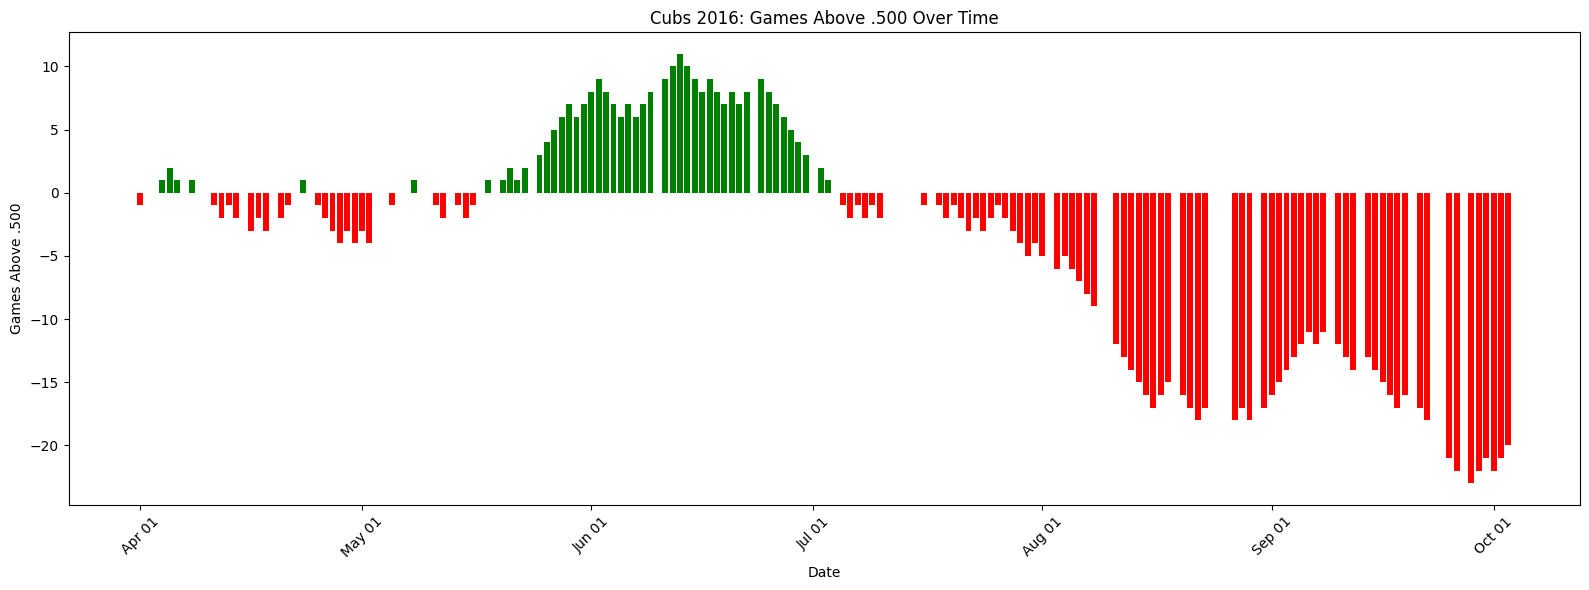

In [4]:
# bar chart of Games Above .500 with color based on value
import matplotlib.dates as mdates

dates = pd.to_datetime(cubs['Date'], format = '%A, %b %d', errors='coerce')
games_above = cubs['Games Above .500']

colors = ['green' if val >= 0 else 'red' for val in games_above]

plt.figure(figsize=(16,6))
plt.bar(dates, games_above, color=colors)
plt.xlabel('Date')
plt.ylabel('Games Above .500')
plt.title('Cubs 2016: Games Above .500 Over Time')
plt.xticks(rotation=45)

ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.tight_layout()
plt.show()